<a href="https://colab.research.google.com/github/zyberg2091/spooky-author-identification/blob/master/Spooky_Author_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Dense,LSTM,SimpleRNN,Dropout,Conv1D,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
import pandas as pd
df=pd.read_csv("train.csv")
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
df.columns.values

array(['id', 'text', 'author'], dtype=object)

In [4]:
df=pd.get_dummies(data=df,columns=['author'])

In [5]:
df.head()

,id,text,author_EAP,author_HPL,author_MWS
0,id26305,"This process, however, afforded me no means of...",1,0,0
1,id17569,It never once occurred to me that the fumbling...,0,1,0
2,id11008,"In his left hand was a gold snuff box, from wh...",1,0,0
3,id27763,How lovely is spring As we looked from Windsor...,0,0,1
4,id12958,"Finding nothing else, not even gold, the Super...",0,1,0


In [6]:
#df['author']=df['author'].map({'EAP':0,'HPL':1,'MWS':2})

In [7]:
x=df.iloc[:,:2].values
y=df.iloc[:,[-3,-2,-1]].values

In [8]:
x.shape,y.shape

((19579, 2), (19579, 3))

In [9]:
tokenizer=Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(x[:,1])
vocab=len(tokenizer.word_index)
sequence=tokenizer.texts_to_sequences(x[:,1])
x_pad=pad_sequences(sequence)
print(vocab)

25944


In [10]:
x_pad.shape

(19579, 861)

In [11]:
x_pad[1].shape

(861,)

In [12]:
#architecture
T=x_pad.shape[1]

i=Input(shape=(T,))
x=Embedding(vocab+1,64)(i)
x=LSTM(128)(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(3,activation='softmax')(x)

model=Model(i,x)

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 861)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 861, 64)           1660480   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,767,747
Trainable params: 1,767,747
Non-trainable params: 0
____________________________________________

In [13]:
print(T)

861


In [14]:
x_pad.shape,y.shape

((19579, 861), (19579, 3))

In [15]:
r=model.fit(x_pad,y,epochs=10,verbose=1)

Epoch 1/10
612/612 [==============================] - 521s 852ms/step - loss: 0.6442 - accuracy: 0.7172
Epoch 2/10
612/612 [==============================] - 515s 841ms/step - loss: 0.2534 - accuracy: 0.9079
Epoch 3/10
612/612 [==============================] - 519s 848ms/step - loss: 0.1310 - accuracy: 0.9543
Epoch 4/10
612/612 [==============================] - 520s 850ms/step - loss: 0.0776 - accuracy: 0.9720
Epoch 5/10
612/612 [==============================] - 521s 851ms/step - loss: 0.0536 - accuracy: 0.9813
Epoch 6/10
612/612 [==============================] - 520s 849ms/step - loss: 0.0383 - accuracy: 0.9865
Epoch 7/10
612/612 [==============================] - 523s 854ms/step - loss: 0.0360 - accuracy: 0.9883
Epoch 8/10
612/612 [==============================] - 517s 845ms/step - loss: 0.0232 - accuracy: 0.9919
Epoch 9/10
612/612 [==============================] - 519s 848ms/step - loss: 0.0188 - accuracy: 0.9935
Epoch 10/10
612/612 [==============================] - 523s 854m

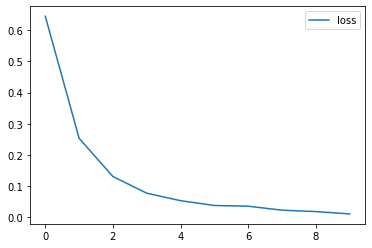

In [16]:
plt.plot(r.history['loss'],label='loss')
plt.legend()

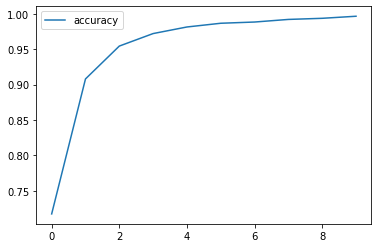

In [17]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.legend()

In [18]:
test_sentence=["Still, as I urged our leaving Ireland with such inquietude and impatience, my father thought it best to yield."]

test_seq=tokenizer.texts_to_sequences(test_sentence)

In [19]:
test_pad=pad_sequences(test_seq,maxlen=T,padding='pre')

In [20]:
test_pad.shape

(1, 861)

In [21]:
test_pad[0].shape

(861,)

In [22]:
predictions=model.predict(test_pad)

In [23]:
predictions[0]

array([0.81492865, 0.05728413, 0.12778723], dtype=float32)